In [16]:
%run 2.Ecoli_model.ipynb

Putrescine
ptrc_p
Putrescine
ptrc_c
Putrescine
ptrc_e
9.564770642201834
N-Acetyl-L-glutamate 5-semialdehyde
acg5sa_c
N2-Succinyl-L-glutamate 5-semialdehyde
sucgsa_c
L-Glutamate 5-semialdehyde
glu5sa_c
Ornithine
orn_e
Ornithine
orn_p
Ornithine
orn_c
2-Oxoglutarate
akg_e
2-Oxoglutarate
akg_c
2-Oxoglutarate
akg_p
L-Glutamate 1-semialdehyde
glu1sa_c
L-Glutamate
glu__L_c
L-Glutamate 5-semialdehyde
glu5sa_c
L-Glutamate
glu__L_e
L-Glutamate
glu__L_p
L-Glutamate 5-phosphate
glu5p_c
glu5sa_c + glu__L_c --> akg_c + orn_c
53.02333333333343
45.78742857142842
9.929142857142859
L-Arginine
arg__L_c
L-Arginine
arg__L_e
L-Arginine
arg__L_p
Urea CH4N2O
urea_c
Urea CH4N2O
urea_p
Urea CH4N2O
urea_e
H2O H2O
h2o_p
H2O H2O
h2o_c
H2O H2O
h2o_e
arg__L_c + h2o_c --> orn_c + urea_c
9.929142857142859


## Phenotypic phase plane analysis

In [17]:
from cobra.flux_analysis.phenotype_phase_plane import production_envelope, add_envelope

### Aerobic conditions

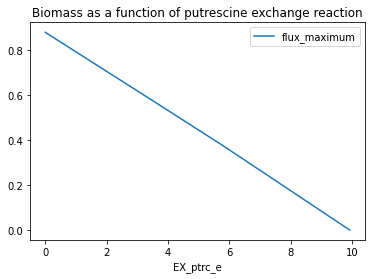

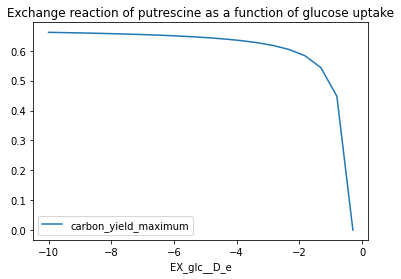

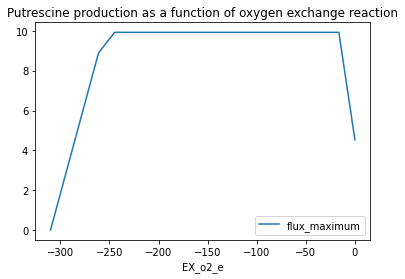

In [21]:
medium = model.medium
with model:
    model.medium = medium
    model.objective = model.reactions.EX_ptrc_e
    put_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_ptrc_e],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_PTRC = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.EX_ptrc_e)
    ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.EX_ptrc_e)

    ppp_BIOMASS.plot(x='EX_ptrc_e', y='flux_maximum', title = 'Biomass as a function of putrescine exchange reaction' ) #carbon yield of biomass as function of glucose uptake
    ppp_PTRC.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'Exchange reaction of putrescine as a function of glucose uptake') #carbon yield of putrescine as function of glucose uptake
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Putrescine production as a function of oxygen exchange reaction')

In the first figure we observe that there is a linear correlation between biomass production and putrescine production. The more carbon goes to putrescine production, the less goes to biomass.

In the second figure we see that the more glucose is consumed, we have a larger production of putrescine. When glucose exchange reaction nears zero, the putrescine production falls dramatically.

In the third figure we see that there is low putrescine production when there is very little oxygen. It produces well (high flux) in a range of oxygen, before falling again at very high oxygen. 


### Anaerobic environment

Now we try in an anaerobic environment to see if it gives different results

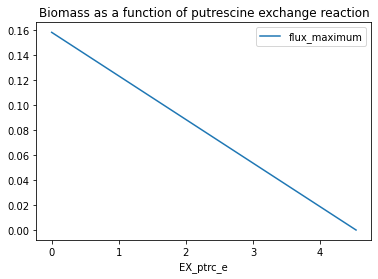

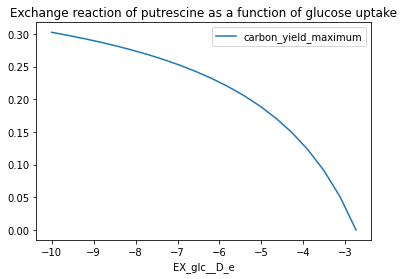

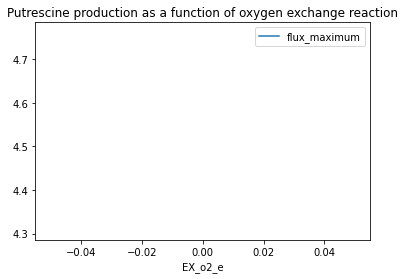

In [20]:
medium = model.medium
with model:
    medium['EX_o2_e'] = 0
    model.medium = medium
    model.objective = model.reactions.EX_ptrc_e
    put_production = model.optimize().objective_value
    ppp_BIOMASS = production_envelope(model,
                    reactions=[model.reactions.EX_ptrc_e],
                    objective=model.reactions.BIOMASS_Ec_iML1515_core_75p37M)
    ppp_PTRC = production_envelope(model,
                    reactions=[model.reactions.EX_glc__D_e],
                    objective=model.reactions.EX_ptrc_e)
    ppp_o2 = production_envelope(model,
                    reactions=[model.reactions.EX_o2_e],
                    objective=model.reactions.EX_ptrc_e)
    ppp_BIOMASS.plot(x='EX_ptrc_e', y='flux_maximum', title = 'Biomass as a function of putrescine exchange reaction' ) #carbon yield of biomass as function of glucose uptake
    ppp_PTRC.plot(x='EX_glc__D_e', y='carbon_yield_maximum', title = 'Exchange reaction of putrescine as a function of glucose uptake') #carbon yield of putrescine as function of glucose uptake
    ppp_o2.plot(x='EX_o2_e', y='flux_maximum', title = 'Putrescine production as a function of oxygen exchange reaction')

In the first figure we observe that there is a linear correlation between biomass production and putrescine production. It reaches lower biomass values as well as putrescine values compared with the aerobic conditions.

In the second figure we see that the more glucose is consumed, we have a larger production of putrescine. However the fall is more gradual compared with the aerobic conditions.

In the third figure we see no line which fits with the anaerobic conditions.
